## neural network classification

In [1]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 2.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.7 MB/s eta 0:00:0000:0100:01


In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)

X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [5]:
import pandas as pd

circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


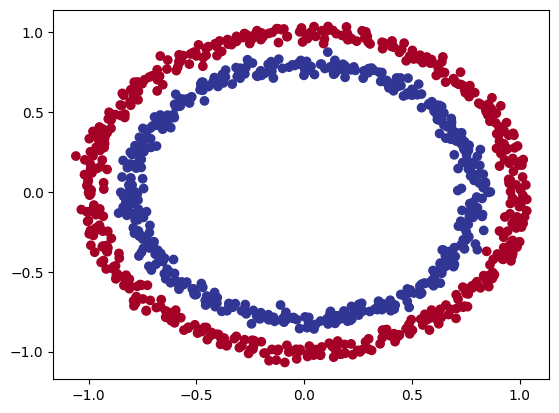

In [7]:
import matplotlib.pyplot as plt

plt.scatter(circles["X1"],circles["X2"],c=circles["label"], cmap=plt.cm.RdYlBu)

## using tensors for classification

In [12]:
import torch
from torch import nn

In [10]:
X_val = torch.from_numpy(X).type(torch.float)
y_val = torch.from_numpy(y).type(torch.float)

In [11]:
# train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42)

## Defining a model ( linear )

In [13]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    def forward(self, x: torch.Tensor)->torch.Tensor:
        return self.layer_2(self.layer_1(x))


In [16]:
model_0 = CircleModel()
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3941,  0.2490],
                      [-0.2437,  0.6734],
                      [-0.4430,  0.5440],
                      [-0.0598,  0.1450],
                      [ 0.6532, -0.3045]])),
             ('layer_1.bias',
              tensor([ 0.4709, -0.1923, -0.6652, -0.5181,  0.0216])),
             ('layer_2.weight',
              tensor([[ 0.2108,  0.2040,  0.2623, -0.2869,  0.2681]])),
             ('layer_2.bias', tensor([0.3269]))])

In [18]:
## or another way is
model_0_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)

model_0_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2585, -0.3216],
                      [-0.1342, -0.3659],
                      [ 0.0705,  0.3505],
                      [ 0.2709,  0.3662],
                      [-0.5853,  0.3299]])),
             ('0.bias', tensor([ 0.2846, -0.0419,  0.4927, -0.5169, -0.6273])),
             ('1.weight',
              tensor([[ 0.3440,  0.0575,  0.2868,  0.0500, -0.4381]])),
             ('1.bias', tensor([-0.3293]))])

In [30]:
with torch.no_grad():
    y_pred = model_0(X_test)
y_pred[:5]

tensor([[0.5310],
        [0.5669],
        [0.3408],
        [0.5852],
        [0.1884]])

In [48]:
def plot_data(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10,7))

    # plt.scatter(train_data[:,0],train_data[:,1] , c = train_labels, s=4, cmap=plt.cm.RdYlBu, label='Training set')
    plt.scatter(test_data[:,0],test_data[:,1] , c = test_labels, s=4, cmap=plt.cm.RdYlBu, label='Test set')
    # plt.scatter(test_data, test_labels, c='g', s=4, label='Test set')
    if predictions != None:
        # plt.scatter(test_data, predictions, c='b', s=4, label='Prediction set')
        plt.scatter(test_data[:,0],test_data[:,1] , c = predictions, s=4, cmap="plasma", label='Predictions set')

    plt.legend(prop={"size":14})

In [44]:
plt.cm

<module 'matplotlib.cm' from '/home/groupe/vs_code/jupyter/env/lib/python3.11/site-packages/matplotlib/cm.py'>

In [22]:
X_test.shape, y_pred.shape

(torch.Size([200, 2]), torch.Size([200, 1]))

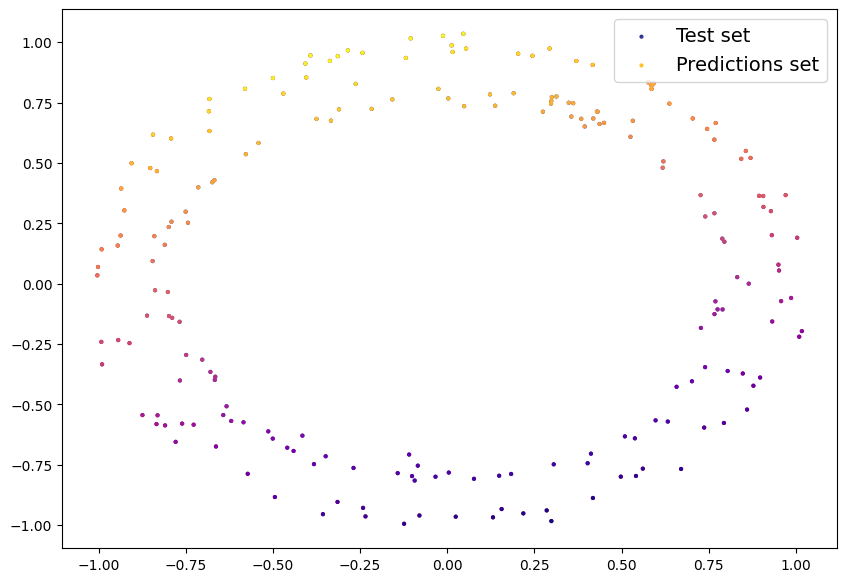

In [49]:

plot_data(predictions=y_pred)

In [62]:
loss_fn = nn.BCEWithLogitsLoss() ## logits are raw outputs of function withput passing through any activation function
## similar to
## nn.Sequential(nn.Sigmoid(),nn.BCELoss())

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

## finding logits
note : logits --> prediction probabilities --> predictions labels

In [64]:
model_0.eval()
with torch.no_grad():
    y_pred = model_0(X_test[:5]) # called logits
y_pred

tensor([[0.5310],
        [0.5669],
        [0.3408],
        [0.5852],
        [0.1884]])

In [65]:
## applying sigmoid for prediction probabilities
y_pred_prop = torch.sigmoid(y_pred)
y_pred_prop

tensor([[0.6297],
        [0.6380],
        [0.5844],
        [0.6423],
        [0.5470]])

In [81]:
## to labels
y_pred = torch.round(y_pred_prop) ## done for binary classification , basically 1 if x>0.5 else 0
y_pred

tensor([0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
        1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
        1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 0., 

In [78]:
torch.manual_seed(42)
epochs = 100

epoch_count = []
train_loss = []
test_loss = []
test_accuracy = []
train_accuracy = []

for i in range(epochs):
    model_0.train()
    
    y_pred_logits = model_0(X_train).squeeze()
    y_pred_prop = torch.sigmoid(y_pred_logits)
    y_pred = torch.round(y_pred_prop)
    loss_train = loss_fn(y_pred_logits, y_train)

    acc = accuracy_calc(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss_train.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        epoch_count.append(i)
        y_pred_test_logits = model_0(X_test).squeeze()
        y_pred_test_prop = torch.sigmoid(y_pred_test_logits)
        y_pred_test = torch.round(y_pred_test_prop)
        
        loss_test = loss_fn(y_pred_test_logits, y_test)
        loss_test_acc = accuracy_calc(y_test, y_pred_test)
        

        train_loss.append(loss_train)
        test_loss.append(loss_test)
print(f"Loss: {loss_train}")

Loss: 0.6939475536346436


from matplotlib import colormaps

list(colormaps)

In [73]:
def accuracy_calc(y_true, y_pred):
    correct = torch.eq(y_true, y_pred)
    acc = (correct/len(y_pred))*100
    return acc

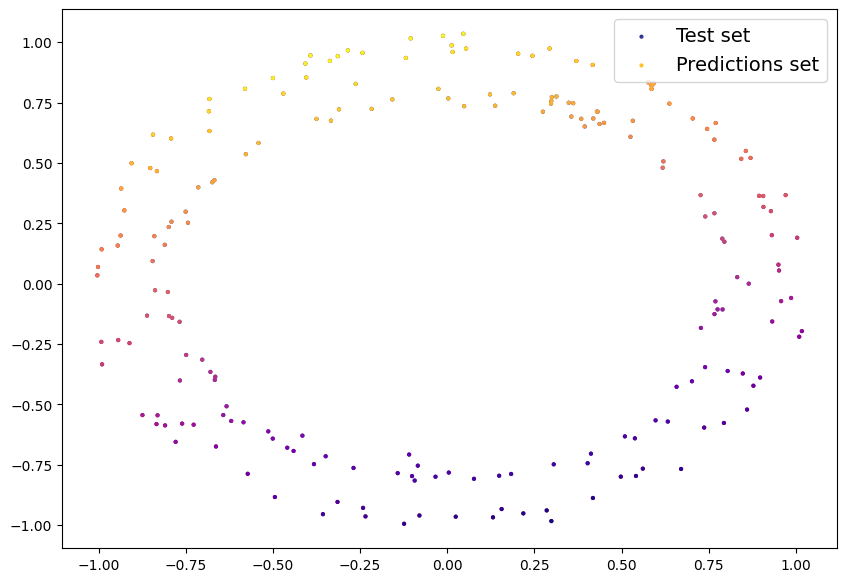

In [60]:
with torch.inference_mode():
    y_pred = model_0(X_test)
    plot_data(predictions=y_pred)

In [79]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

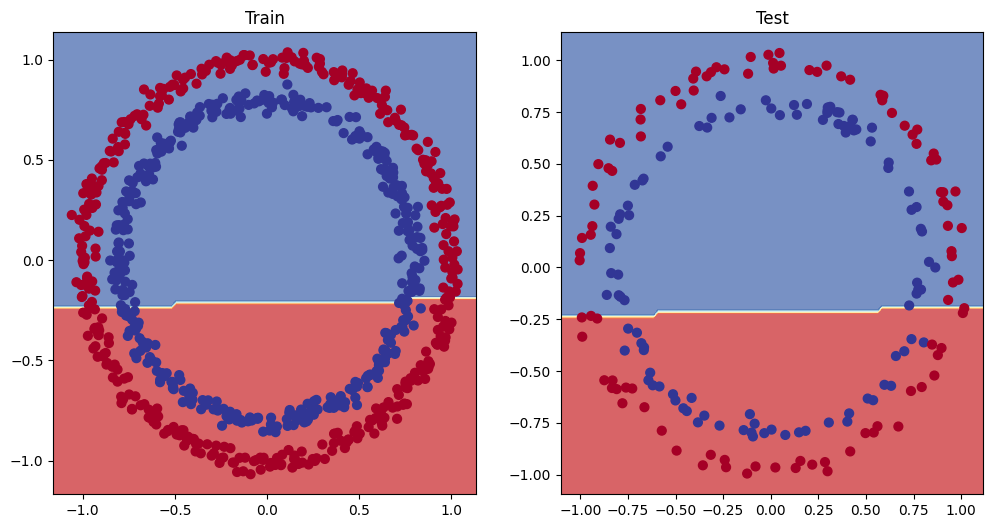

In [80]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Using more number of layers

In [83]:
class CircleModel2(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModel2()

In [89]:
torch.manual_seed(42)
epochs = 100

epoch_count = []
train_loss = []
test_loss = []
test_accuracy = []
train_accuracy = []

for i in range(epochs):
    model_1.train()

    y_pred_logits = model_1(X_train).squeeze()
    y_pred_prop = torch.sigmoid(y_pred_logits)
    y_pred = torch.round(y_pred_prop)
    loss_train = loss_fn(y_pred_logits, y_train)

    optimizer.zero_grad()
    
    loss_train.backward()

    optimizer.step()

    model_1.eval()

    with torch.no_grad():
        y_test_logits = model_1(X_test).squeeze()
        y_test_prop = torch.sigmoid(y_test_logits)
        y_test_ = torch.round(y_test_prop)
        loss_test = loss_fn(y_test_logits, y_test)

print(loss_train)
    

tensor(0.6940, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


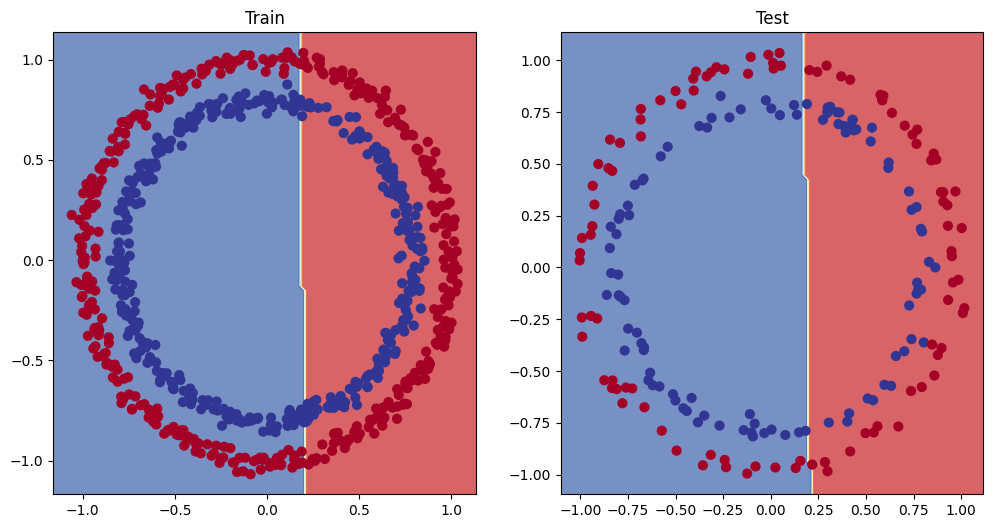

In [90]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## let's have non linearity

In [134]:
class CircleModel3(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features = 2, out_features=10)
        self.layer2 = nn.Linear(in_features = 10, out_features=10)
        self.layer3 = nn.Linear(in_features = 10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.layer2(self.relu(self.layer1(x))))

model_2 = CircleModel3()

In [135]:
loss_fn = nn.BCEWithLogitsLoss() ## logits are raw outputs of function withput passing through any activation function
## similar to
## nn.Sequential(nn.Sigmoid(),nn.BCELoss())

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [138]:
torch.manual_seed(42)
epochs = 1000

epoch_count = []
train_loss = []
test_loss = []
test_accuracy = []
train_accuracy = []

for i in range(epochs):
    model_2.train()

    y_pred_logits = model_2(X_train).squeeze()
    y_pred_prop = torch.sigmoid(y_pred_logits)
    y_pred = torch.round(y_pred_prop)
    loss_train = loss_fn(y_pred_logits, y_train)
    # print(f"loss train {loss_train}")

    optimizer.zero_grad()
    
    loss_train.backward()

    optimizer.step()

    model_2.eval()

    with torch.no_grad():
        y_test_logits = model_2(X_test).squeeze()
        y_test_prop = torch.sigmoid(y_test_logits)
        y_test_ = torch.round(y_test_prop)
        loss_test = loss_fn(y_test_logits, y_test)

print(loss_train, loss_test)
    

tensor(0.0311, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) tensor(0.0637)


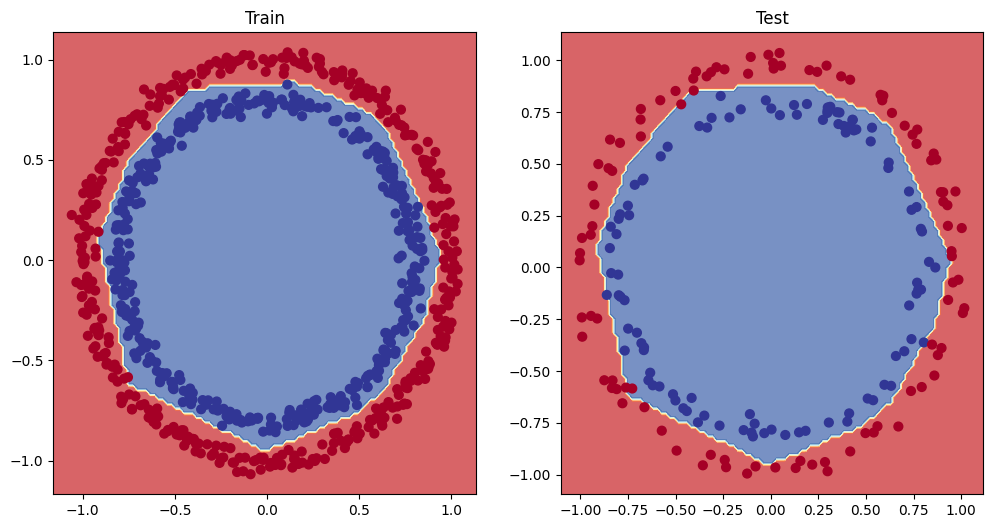

In [139]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

## Getting along with multi class classification

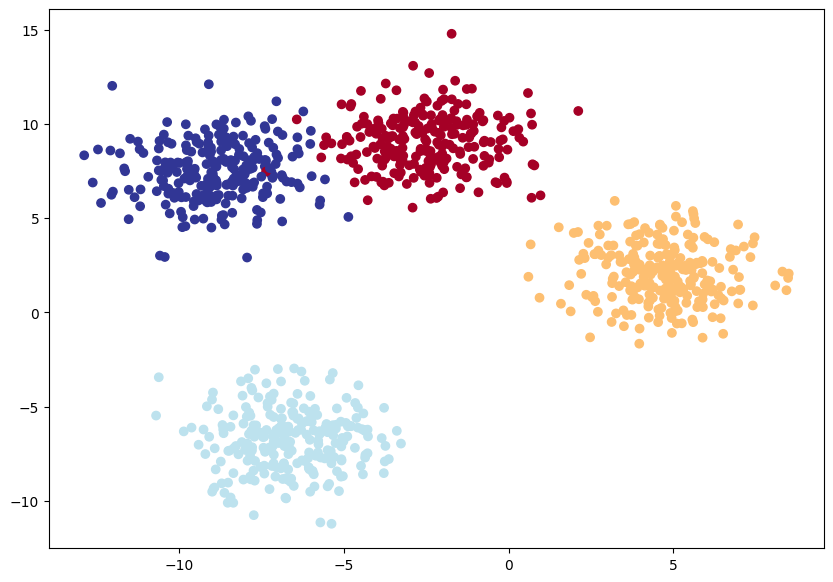

In [167]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

## plotting
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [168]:
y_blob[:5]

tensor([3, 2, 2, 1, 1])

In [143]:
%config Completer.use_jedi = False

In [183]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """
            Initializing multi class classification

            Args:
                input_features - number of inputs features to the model
                output_features - number of output features
                hidden_units - number of hidden units
            Returns:

            Example:
            
        """
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self,x):
        return self.linear_stack(x)

In [147]:
model_3 = BlobModel(2, 4, )

In [184]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [149]:
model_3(X_blob)

tensor([[-0.0994, -0.9491, -0.5983, -0.1356],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        ...,
        [-0.5531, -0.9302, -1.3181, -0.8052],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.1269, -1.0114, -0.6573, -0.1491]], grad_fn=<AddmmBackward0>)

## note 

For multicalss classification crossentropy is used as loss function and softmax is used to compute prediction probabilities

In [172]:
y_logits = model_3(X_train)
y_logits

y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

loss_fn(y_logits,y_train)

tensor(1.1588, grad_fn=<NllLossBackward0>)

In [185]:
## creating loops

epochs = 100

for i in range(epochs):
    model_3.train()

    y_logits = model_3(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss_train = loss_fn(y_logits, y_train)

    optimizer.zero_grad()

    loss_train.backward()

    optimizer.step()

    model_3.eval()

    with torch.no_grad():
        y_test_logits = model_3(X_test)
        y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
        loss_test = loss_fn(y_test_logits,y_test)

print(f"Loss train {loss_train}")
print(f"Loss test {loss_test}")

Loss train 0.026546981185674667
Loss test 0.016480371356010437


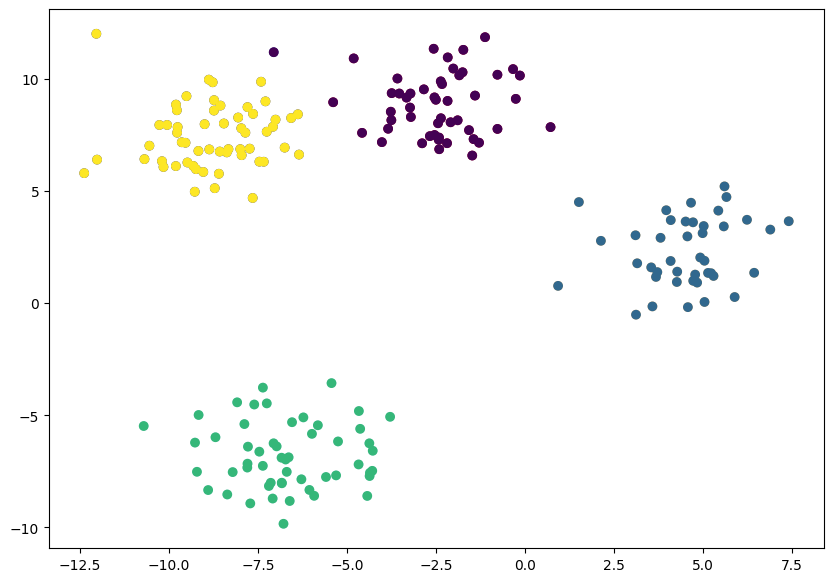

In [186]:
y_pred = torch.softmax(model_3(X_test), dim=1).argmax(dim=1)

plt.figure(figsize=(10,7))
# plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)


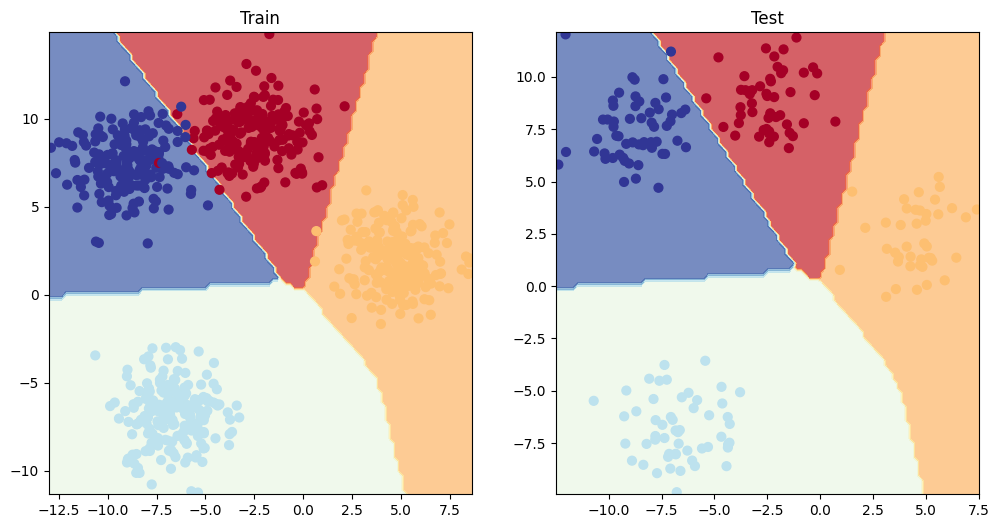

In [187]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## torch matrices

In [196]:
from torchmetrics import Accuracy, ConfusionMatrix

torchmetrics_acc = Accuracy(task='multiclass',num_classes=NUM_CLASSES)

print(torchmetrics_acc(y_pred,y_test))

ConfusionMatrix(task='multiclass',num_classes=NUM_CLASSES)(y_pred,y_test)

tensor(0.9950)


tensor([[49,  0,  0,  0],
        [ 0, 41,  0,  0],
        [ 0,  0, 53,  0],
        [ 1,  0,  0, 56]])